# Introduction
Welcome to Part III! In Part II, you generated text-related metrics and visualized them with barplots. 

In this Part, you will perform sentiment analysis on the text. More specifically, you will chart how the sentiments move over parts of the texts. 

You execute this by:
- splitting a text into sentences
- measuring the sentiment in each sentence
- plotting the sentiments in each sentence
- splitting the text by chapters
- measure aggregate sentiment by chapters
- normalizing the length of the chapters for cross-text comparison

### Step 1: Import libraries
First up, let's get our libraries.
- pandas as pd
- matplotlib.pyplot as plt
- SentimentIntensityAnalyzer from vaderSentiment.vaderSentiment
- sent_tokenize from nltk

In [ ]:
# Step 1: Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string 
import nltk
from wordcloud import WordCloud
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import textstat
from nltk import  sent_tokenize, word_tokenize

### Step 2: Read CSV from Part I into DataFrame
Next, let's load up the CSV that we got from Part I into a DataFrame. 

In [ ]:
# Step 2: Read the CSV from Part I

In [2]:
df=pd.read_csv('cleaned_harry_potter.csv') 

In [3]:
df

,name,full_text
0,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone CHAPTER ...
1,Harry Potter and The Chamber of Secrets,J . K . R O W L ! N G HARRY POTTER /...
2,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban by ...
3,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire By J.K. ...
4,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix J K ...
5,Harry Potter and The Half-Blood Prince,Harry Potter and The Half-Blood Prince Chapte...
6,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows By J. K....


## Test sentiment analysis with one text
Before we analyze all seven texts, we should start with one text and identify the best strategy needed for our analysis.

We'll start with the first text.

### Step 3: Get the first text 
Declare a variable, and assign it the first text.

In [ ]:
# Step 3: Assign the first text to a variable

In [4]:
text1=df['full_text'][0]

In [6]:
text1

'Harry Potter and the Sorcerer\'s Stone CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you\'d expect to be involved in anything strange or mysterious, because they just didn\'t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn\'t think they could bear it if anyone found out about the Potters. Mrs

### Step 4: Split the text by sentence
Declare another variable, where each item is a separate sentence. 

You can use nltk's sent_token, which can tokenize texts into sentences.

You should expect 6,394 sentences in the resulting list.

In [ ]:
# Step 4: Split the text by sentences

In [7]:
sent_text1=sent_tokenize(text1)

In [8]:
sent_text1

["Harry Potter and the Sorcerer's Stone CHAPTER ONE THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.",
 "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 'Mr. Dursley was the director of a firm called Grunnings, which made drills.',
 'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
 'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
 'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 'The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
 "They didn't think they could bear it if anyone found o

### Step 5: Calculate the sentiment score for the sentences
Now that you have a list of sentences let's loop through them and get their respective sentiment.

The code examples in the documentation are useful in getting yous started: https://github.com/cjhutto/vaderSentiment

Create a new list containing the <strong>compound</strong> scores of each sentence.

In [ ]:
# Step 5: Create a list of compound scores

In [18]:
sent_score_text1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in sent_text1:
    vs = analyzer.polarity_scores(sentence)
    #print("{:-<65} {}".format(sentence, str(vs)))
    sent_score_text1.append(vs['compound'])
   


In [19]:
sent_score_text1

[0.8779,
 -0.5423,
 0.0,
 0.0,
 0.4927,
 -0.296,
 0.3612,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6343,
 -0.5423,
 -0.4005,
 0.0,
 -0.6808,
 0.0,
 0.1027,
 0.1531,
 -0.2023,
 0.0,
 0.0,
 -0.0516,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1045,
 0.4215,
 0.0,
 -0.5358,
 0.0,
 0.4926,
 -0.5267,
 -0.2732,
 0.5106,
 -0.4574,
 0.0,
 0.296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6369,
 0.0,
 0.2023,
 0.4927,
 -0.2263,
 -0.4215,
 -0.5267,
 0.5106,
 0.0,
 -0.5423,
 -0.4939,
 0.5927,
 0.3732,
 -0.5267,
 0.0,
 0.3182,
 -0.2411,
 0.0,
 0.0,
 0.0,
 -0.7886,
 0.3111,
 -0.2421,
 -0.0772,
 0.0,
 -0.3818,
 0.7781,
 0.4926,
 0.9389,
 0.4019,
 0.0,
 0.4019,
 0.0,
 0.0,
 0.1571,
 -0.2746,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.34,
 0.4215,
 -0.4574,
 0.0,
 0.0,
 0.0,
 0.0,
 0.4767,
 0.0,
 0.0,
 0.0,
 0.1406,
 0.4199,
 0.6114,
 0.4497,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.3412,
 0.0,
 -0.0516,
 0.3818,
 -0.6808,
 0.0,
 0.0,
 0.0,
 0.4404,
 0.0,
 0.0,
 0.2732,
 0.0,
 0.0,
 0.0,
 0.1779,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.5574,


<details>
    <summary><strong>Click once to get pseudocode if you're stuck</strong></summary>
    <ol>
        <li>Declare a variable and assign an empty list to it</li>
        <li>Declare a variable containing a SentimentIntensityAnalyzer object</li>
        <li>Use a for loop to loop through the list from Step 4. In each loop:</li>
        <ul>
            <li>Use the SentimentIntensityAnalyzer object's .polarity_scores method to measure the current loop's sentence's score</li>
            <li>Get the value of the "compound" key of the .polarity_scores method result</li>
            <li>Append that value into the list declared above</li>
        </ul>
    </ol>
</details>

### Step 6: Create a DataFrame of sentiments for first text
Now that you have:
- a list of sentences
- a list of compound scores of each sentence

you can now create a DataFrame for them so that we can plot it later. 

![BookOneSentiment](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/BookOneSentiment.png)

This is what you'll get once you're done.

In [ ]:
# Step 6: Create a sentiment DataFrame

In [20]:
df_sentiment_text1 = pd.DataFrame()
df_sentiment_text1['sentence']  = sent_text1
df_sentiment_text1['compound']  = sent_score_text1

In [21]:
df_sentiment_text1

,sentence,compound
0,Harry Potter and the Sorcerer's Stone CHAPTER ...,0.8779
1,They were the last people you'd expect to be i...,-0.5423
2,Mr. Dursley was the director of a firm called ...,0.0000
3,"He was a big, beefy man with hardly any neck, ...",0.0000
4,Mrs. Dursley was thin and blonde and had nearl...,0.4927
...,...,...
6389,"""See you over the summer, then.""",0.0000
6390,"""Hope you have -- er -- a good holiday,"" said ...",-0.0493
6391,"""Oh, I will,"" said Harry, and they were surpri...",0.6124
6392,"""They don't know we're not allowed to use magi...",0.0000


### Step 7: Plot the sentiment 
The moment of truth...let's plot the sentiment in the "compound" column, and let's see what we get!

In [ ]:
# Step 7: Plot compound

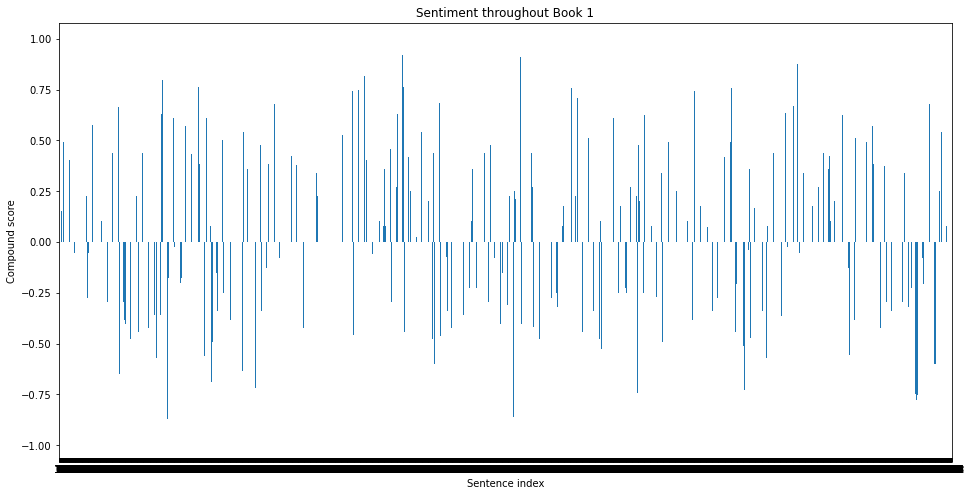

In [22]:
plt.figure(figsize=(16, 8))
ax = df_sentiment_text1['compound'].plot(kind='bar' ,rot=0)
ax.set_title('Sentiment throughout Book 1')
ax.set_xlabel('Sentence index')
ax.set_ylabel('Compound score')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

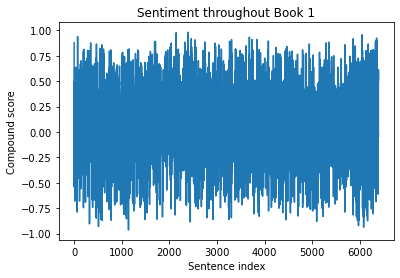

In [30]:
plt.plot(df_sentiment_text1['compound'])
plt.title('Sentiment throughout Book 1')
plt.xlabel('Sentence index')
plt.ylabel('Compound score')
plt.show


<details>
    <summary><strong>What <em>did</em> we get? Click once to see our plot</strong></summary>
    <img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/BookOneSentenceSentimentPlot.png">
    <br>
    <div>It's a really messy plot that oscillates wildly. Not really helpful :/</div>
</details>

### [Optional] Perform Savitsky-Golay filter on the sentiment data
Savitsky-Golay filter removes noise from signals through polynomial smoothing. If we assume the signals to be continuous, and that the fluctuations are noise, we can use the filter to smoothen the signals. 

Reading: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html

Here's what you need to do:
1. Import savgol_filter from scipy.signal
2. Transform 'compound' with the filter, with a window length of 151 and the 5th polynomial order
3. Plot the transformed signal

Feel free to change the window and polynomial order.

In [ ]:
# Import savgol filter

# Plot the original 'compound' from the DataFrame

# Declare a variable that contains the transformed signal through savgol filter

# Plot the transformed signal

In [32]:
from scipy.signal import savgol_filter
df_sentiment_text1['compound_savgol']=savgol_filter(df_sentiment_text1['compound'], 151, 5)

In [33]:
df_sentiment_text1

,sentence,compound,compound_savgol
0,Harry Potter and the Sorcerer's Stone CHAPTER ...,0.8779,0.173661
1,They were the last people you'd expect to be i...,-0.5423,0.148259
2,Mr. Dursley was the director of a firm called ...,0.0000,0.124763
3,"He was a big, beefy man with hardly any neck, ...",0.0000,0.103087
4,Mrs. Dursley was thin and blonde and had nearl...,0.4927,0.083146
...,...,...,...
6389,"""See you over the summer, then.""",0.0000,0.097166
6390,"""Hope you have -- er -- a good holiday,"" said ...",-0.0493,0.122142
6391,"""Oh, I will,"" said Harry, and they were surpri...",0.6124,0.149897
6392,"""They don't know we're not allowed to use magi...",0.0000,0.180573


<function matplotlib.pyplot.show(close=None, block=None)>

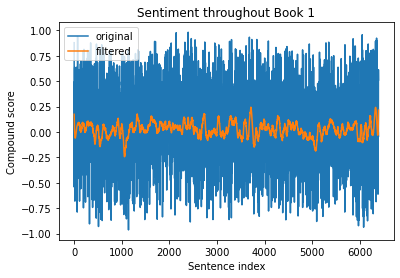

In [41]:
plt.plot(df_sentiment_text1['compound'],label="original")
plt.plot(df_sentiment_text1['compound_savgol'],label="filtered")
plt.title('Sentiment throughout Book 1')
plt.xlabel('Sentence index')
plt.ylabel('Compound score')
plt.legend(loc="upper left")
plt.show

<details>
    <summary><strong>Click once to see our plot</strong></summary>
    <img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/BookOneSentenceSentimentPlotWithSavGolFilter.png
">
</details>

### Measure sentiment by chapter
It seems that splitting the text by sentence led to too many values. Instead, we can try to split the text by chapter.

![ChapterSplitStrategy](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/ChapterSplitStrategy.png)

In the following approach, these are the steps:
1. <font color='red'>Split a full text into chapters</font>
2. <font color='green'>Split each chapter into sentences</font>
3. <font color='blue'>Measure the score for each sentence in a chapter</font>
4. <font color='orange'>Get the average of the sentiment in each chapter based on the sentences</font>

### Step 8: Split the text by chapter
Declare a variable, and split the text with "CHAPTER".

Make sure your list has 17 items only, i.e. remove the first item in the list after splitting.

In [ ]:
# Step 8: Split the text by "CHAPTER"

In [51]:
chapter1=[]
chapter1= text1.split("CHAPTER")
chapter1=chapter1[1:]
print(len(chapter1))

17


In [52]:
chapter1

[' ONE THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you\'d expect to be involved in anything strange or mysterious, because they just didn\'t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn\'t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley\'s sister, but they

In [53]:
print(len(chapter1))

17


### Step 9: Get a list of list of sentences
Loop through the list of chapters, and in each chapter use sent_tokenize to break the chapter into a list of sentences.

You will end up with a list containing 17 lists.

In [ ]:
# Step 9: Get a list of list of sentences

In [54]:
chapter1_list=[]
for chapter in chapter1:
    sent_chapter_text1=sent_tokenize(chapter)
    chapter1_list.append(sent_chapter_text1)
   

In [55]:
chapter1_list

[[' ONE THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.',
  "They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
  'Mr. Dursley was the director of a firm called Grunnings, which made drills.',
  'He was a big, beefy man with hardly any neck, although he did have a very large mustache.',
  'Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.',
  'The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
  'The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it.',
  "They didn't think they could bear it if anyone found out about the Potters.",
  "Mrs. Potte

In [56]:
len(chapter1_list)

17

<details>
    <summary><strong>Click once to see the pseudocode</strong></summary>
    <ol>
        <li>Declare an empty list</li>
        <li>Use a for loop to loop through the list of chapters. In each loop:</li>
        <ul>
            <li>Use sent_tokenize on the current chapter to split it into a list of sentences and assign it to a variable</li>
            <li>Append the list of sentences to the empty list declared above</li>
        </ul>
    </ol>
</details>

### Step 10: Measure the sentiment for each sentence in the list of list of sentences
More loops ahead! 

In the list that you got from Step 9, loop through each sentence in each of your 17 lists and measure its sentiment.

![ListOfListOfSentiments](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/ListOfListOfSentiments.png)

What you have at the end is a list of lists that contain scores.

<details>
    <summary><strong>Click once to see the pseudocode</strong></summary>
    <ol>
        <li>Declare an empty list (List 1)</li>
        <li>Declare a variable containing SentimentIntensityAnalyzer object</li>
        <li>Use a for loop to loop through the list of list of sentences. In each loop:</li>
        <ul>
            <li>Declare a variable containing an empty list (List 2)</li>
            <li>Use a for loop to loop through list of sentence. In each loop:</li>
            <ul>
                <li>Use the SentimentIntensityAnalyzer to get the polarity scores of the current sentence and assign the results to a variable</li>
                <li>Get the value of the 'compound' key of the variable above</li>
                <li>Append that 'compound' score to List 2</li>
            </ul>
            <li>Append the List 2 into List 1</li>
        </ul>
    </ol>
</details>

In [ ]:
# Step 10: Measure the sentiment for each sentence 

In [59]:
List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter1_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)
   


In [60]:
List1

[[0.8779,
  -0.5423,
  0.0,
  0.0,
  0.4927,
  -0.296,
  0.3612,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6343,
  -0.5423,
  -0.4005,
  0.0,
  -0.6808,
  0.0,
  0.1027,
  0.1531,
  -0.2023,
  0.0,
  0.0,
  -0.0516,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.1045,
  0.4215,
  0.0,
  -0.5358,
  0.0,
  0.4926,
  -0.5267,
  -0.2732,
  0.5106,
  -0.4574,
  0.0,
  0.296,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6369,
  0.0,
  0.2023,
  0.4927,
  -0.2263,
  -0.4215,
  -0.5267,
  0.5106,
  0.0,
  -0.5423,
  -0.4939,
  0.5927,
  0.3732,
  -0.5267,
  0.0,
  0.3182,
  -0.2411,
  0.0,
  0.0,
  0.0,
  -0.7886,
  0.3111,
  -0.2421,
  -0.0772,
  0.0,
  -0.3818,
  0.7781,
  0.4926,
  0.9389,
  0.4019,
  0.0,
  0.4019,
  0.0,
  0.0,
  0.1571,
  -0.2746,
  0.0,
  0.3182,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.34,
  0.4215,
  -0.4574,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4767,
  0.0,
  0.0,
  0.0,
  0.1406,
  0.4199,
  0.6114,
  0.4497,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.3412,
  0.0,
  -0.0516,
  0.3818,
  -0.6

### Step 11: Average the list of list of scores
Now that you have a list of list of scores, get the average for each list.

![AveragedChapterSentiments](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/AveragedChapterSentiments.png)

Since you have 17 chapters, you should end up wtih 17 scores in the list.

In [ ]:
# Step 11: Average the compound scores in each chapter

In [68]:
List1_avg=list(map(lambda x: sum(x)/len(x), List1))

### Step 12: Create a DataFrame for the scores
Now that you have a list of averaged sentiment scores, let's create a DataFrame containing two columns:
- chapter
- compound

You'll see something like this.

![BookOneDataFrameCompoundScores](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/BookOneDataFrameCompoundScores.png)

In [ ]:
# Step 12: Create a DataFrame

In [75]:
df1= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
df1['chapter'] = chapter_list
df1['compound'] = List1_avg

In [76]:
df1

,chapter,compound
0,1,0.049492
1,2,-0.022553
2,3,0.000444
3,4,-0.023892
4,5,0.061401
5,6,0.046676
6,7,0.046627
7,8,0.028502
8,9,0.005425
9,10,0.048902


### Step 13: Plot the scores
Now that you have the list of the averaged scores, let's plot it! 

Look out for how the sentiment changes throughout the book.

In [ ]:
# Step 12: Plot the scores for Book 1

<function matplotlib.pyplot.show(close=None, block=None)>

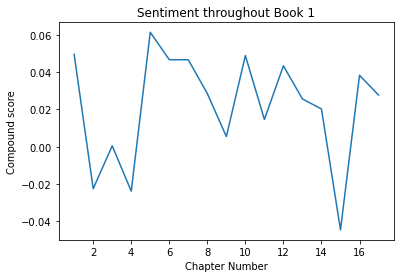

In [77]:
plt.plot(df1['chapter'],df1['compound'])
plt.title('Sentiment throughout Book 1')
plt.xlabel('Chapter Number')
plt.ylabel('Compound score')
plt.show

<details>
    <summary><strong>Click once to see what we got</strong></summary>
    <img src='https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/ChapterOneSentiments.png'>
</details>

## Sentiment analysis with all texts
Now that we have tried the analysis on one text, let's plot the rest! 

### Step 14: Repeat Steps 8-12 with all texts
You'll have to repeat the Steps 8-12 with each text in the list of texts.

At the end, you'll be able to observe seven separate plots from the books.

Make sure that you have the DataFrames for each text as well.

P.S. Bear in mind that not all texts have the same string to denote chapter, i.e. "CHAPTER". Try looking into each text to see how you'd like to split them.

In [ ]:
# Step 14a: Repeat Steps 8-12 with Book 2

In [79]:
# Step 8 for Book  2
text2=df['full_text'][1]
chapter2=[]
chapter2= text2.split("CHAPTER")
chapter2=chapter2[1:]
print(len(chapter2))

18


In [80]:
# Step 9 for Book 2
chapter2_list=[]
for chapter in chapter2:
    sent_chapter_text2=sent_tokenize(chapter)
    chapter2_list.append(sent_chapter_text2)

In [81]:
# Step 10 for Book 2

List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter2_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)

In [82]:
# Step 11 for Book 2 
List2_avg=list(map(lambda x: sum(x)/len(x), List1))

In [83]:
# Step 12 for Book 2 
df2= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
df2['chapter'] = chapter_list
df2['compound'] = List2_avg

In [84]:
df2

,chapter,compound
0,1,0.003743
1,2,-0.054419
2,3,0.031489
3,4,0.059082
4,5,-0.000283
5,6,0.061346
6,7,0.043256
7,8,0.036914
8,9,-0.041517
9,10,-0.012094


In [ ]:
# Step 14b: Repeat Steps 8-12 with Book 3

In [86]:
# Step 8 for Book 3
text3=df['full_text'][2]
chapter3=[]
chapter3= text3.split("CHAPTER")
chapter3=chapter3[1:]
print(len(chapter3))

22


In [87]:
# Step 9 for Book 3
chapter3_list=[]
for chapter in chapter3:
    sent_chapter_text3=sent_tokenize(chapter)
    chapter3_list.append(sent_chapter_text3)

In [88]:
# Step 10 for Book 3

List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter3_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)

In [89]:
# Step 11 for Book 3 
List3_avg=list(map(lambda x: sum(x)/len(x), List1))

In [90]:
# Step 12 for Book 3 
df3= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
df3['chapter'] = chapter_list
df3['compound'] = List3_avg

In [91]:
df3

,chapter,compound
0,1,0.064803
1,2,-0.003505
2,3,0.004744
3,4,0.050666
4,5,-0.012415
5,6,0.020788
6,7,0.036971
7,8,0.029521
8,9,-0.024777
9,10,0.009144


In [ ]:
# Step 14c: Repeat Steps 8-12 with Book 4

In [93]:
# Step 8 for Book 4
text4=df['full_text'][3]
chapter4=[]
chapter4= text4.split("CHAPTER")
chapter4=chapter4[1:]
print(len(chapter4))

37


In [94]:
# Step 9 for Book 4
chapter4_list=[]
for chapter in chapter4:
    sent_chapter_text4=sent_tokenize(chapter)
    chapter4_list.append(sent_chapter_text4)

In [95]:
# Step 10 for Book 4

List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter4_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)

In [96]:
# Step 11 for Book 4 
List4_avg=list(map(lambda x: sum(x)/len(x), List1))

In [97]:
# Step 12 for Book 4 
df4= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]
df4['chapter'] = chapter_list
df4['compound'] = List4_avg

In [98]:
df4

,chapter,compound
0,1,-0.066994
1,2,-0.055656
2,3,0.029678
3,4,-0.012804
4,5,0.051560
5,6,0.037450
6,7,0.100736
7,8,0.057604
8,9,-0.032471
9,10,0.020380


In [ ]:
# Step 14d: Repeat Steps 8-12 with Book 5

In [100]:
# Step 8 for Book 5
text5=df['full_text'][4]
chapter5=[]
chapter5= text5.split("CHAPTER")
chapter5=chapter5[1:]
print(len(chapter5))

38


In [101]:
# Step 9 for Book 5
chapter5_list=[]
for chapter in chapter5:
    sent_chapter_text5=sent_tokenize(chapter)
    chapter5_list.append(sent_chapter_text5)

In [102]:
# Step 10 for Book 5

List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter5_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)

In [103]:
# Step 11 for Book 5
List5_avg=list(map(lambda x: sum(x)/len(x), List1))

In [104]:
# Step 12 for Book 5
df5= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
df5['chapter'] = chapter_list
df5['compound'] = List5_avg

In [105]:
df5

,chapter,compound
0,1,-0.013659
1,2,-0.053359
2,3,-0.008361
3,4,-0.010537
4,5,0.010532
5,6,-0.015892
6,7,0.037491
7,8,0.027343
8,9,0.024142
9,10,0.020949


In [ ]:
# Step 14e: Repeat Steps 8-12 with Book 6

In [109]:
# Step 8 for Book 6
text6=df['full_text'][5]
chapter6=[]
chapter6= text6.split("Chapter")
chapter6=chapter6[1:]
print(len(chapter6))

30


In [110]:
# Step 9 for Book 6
chapter6_list=[]
for chapter in chapter6:
    sent_chapter_text6=sent_tokenize(chapter)
    chapter6_list.append(sent_chapter_text6)

In [111]:
# Step 10 for Book 6

List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter6_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)

In [112]:
# Step 11 for Book 6
List6_avg=list(map(lambda x: sum(x)/len(x), List1))

In [113]:
# Step 12 for Book 6
df6= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df6['chapter'] = chapter_list
df6['compound'] = List6_avg

In [114]:
df6

,chapter,compound
0,1,-0.010066
1,2,0.011442
2,3,0.006926
3,4,0.078804
4,5,0.083270
5,6,0.073436
6,7,0.058457
7,8,0.044999
8,9,0.111526
9,10,0.015969


In [ ]:
# Step 14f: Repeat Steps 8-12 with Book 7

In [116]:
# Step 8 for Book 7
text7=df['full_text'][6]
chapter7=[]
chapter7= text7.split("Chapter")
chapter7=chapter7[1:]
print(len(chapter7))

36


In [117]:
# Step 9 for Book 7
chapter7_list=[]
for chapter in chapter7:
    sent_chapter_text7=sent_tokenize(chapter)
    chapter7_list.append(sent_chapter_text7)

In [118]:
# Step 10 for Book 7

List1=[]
analyzer = SentimentIntensityAnalyzer()
for sentence in chapter7_list:
    List2=[]
    for sentence1 in sentence:
        vs = analyzer.polarity_scores(sentence1)
        #print("{:-<65} {}".format(sentence, str(vs)))
        List2.append(vs['compound'])
    List1.append(List2)

In [119]:
# Step 11 for Book 6
List7_avg=list(map(lambda x: sum(x)/len(x), List1))

In [120]:
# Step 12 for Book 6
df7= pd.DataFrame()
chapter_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
df7['chapter'] = chapter_list
df7['compound'] = List7_avg

### Step 15: Normalize the chapter lengths
You successfully made seven plots, but it is hard to compare between them because of their different lengths. 

If you tried, you'd be faced with a really messy plot.

First things first - you'll need to normalize each DataFrame's chapter. 

![ChapterNormalization](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/ChapterNormalization.png)

We'll need to normalize the chapter lengths by dividing each chapter's "chapter" with the max value. 

In [ ]:
# Divide the "chapter" column for each DataFrame by the max number of chapters
# Step 16a: Normalize the chapters in Book 1 DataFrame

In [122]:
df1['chapter']=df1['chapter']/len(df1['chapter'])

In [ ]:
# Step 16b: Normalize the chapters in Book 2 DataFrame

In [123]:
df2['chapter']=df2['chapter']/len(df2['chapter'])

In [ ]:
# Step 16c: Normalize the chapters in Book 3 DataFrame

In [124]:
df3['chapter']=df3['chapter']/len(df3['chapter'])

In [ ]:
# Step 16d: Normalize the chapters in Book 4 DataFrame

In [125]:
df4['chapter']=df4['chapter']/len(df4['chapter'])

In [ ]:
# Step 16e: Normalize the chapters in Book 5 DataFrame

In [126]:
df5['chapter']=df5['chapter']/len(df5['chapter'])

In [ ]:
# Step 16f: Normalize the chapters in Book 6 DataFrame

In [127]:
df6['chapter']=df6['chapter']/len(df6['chapter'])

In [ ]:
# Step 16g: Normalize the chapters in Book 7 DataFrame

In [128]:
df7['chapter']=df7['chapter']/len(df7['chapter'])

### Step 17: Plot the compound scores from all the texts
Now that you've normalized the chapters in all DataFrames, let's plot all scores on a single figure.

In [ ]:
# Step 17: Plot compound scores from all texts in a single plot

<function matplotlib.pyplot.show(close=None, block=None)>

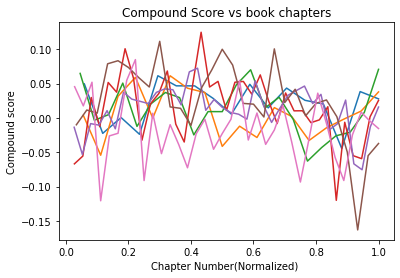

In [130]:
plt.plot(df1['chapter'],df1['compound'])
plt.plot(df2['chapter'],df2['compound'])
plt.plot(df3['chapter'],df3['compound'])
plt.plot(df4['chapter'],df4['compound'])
plt.plot(df5['chapter'],df5['compound'])
plt.plot(df6['chapter'],df6['compound'])
plt.plot(df7['chapter'],df7['compound'])
plt.title('Compound Score vs book chapters')
plt.xlabel('Chapter Number(Normalized) ')
plt.ylabel('Compound score')
plt.show

<details>
    <summary><strong>Click here once to see our plot</strong></summary>
    <img src="https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectHarryPotter/CompoundScoreVsAllBookChaptersNormalized.png">
    <br>
    <div>It seems like the sentiments oscillate throughout the book chapters, followed by a dip towards the end before going up again</div>
</details>

### End of Part III
What a Part!

In this Part, you calculated and plotted sentiment scores throughout the full texts.

We also had an optional part where you implemented a Savgol filter to filter the scores. 

In the next Part, you will analyze your text data in a different way, through word cloud visualization.